In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 18,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [3]:
colors = ["tab:blue", "tab:orange","tab:green","tab:purple","tab:brown","tab:pink","tab:cyan"]

In [36]:
df_jpeg_time = pd.read_csv("../measurements/jpeg_per_frame/time.csv")
df_jpeg_cha = pd.read_csv("../measurements/jpeg_per_frame/characteristic.csv")

df_decom_time = pd.read_csv("../measurements/decomposition_per_frame/time.csv")
df_decom_cha = pd.read_csv("../measurements/decomposition_per_frame/characteristic.csv")

df_reg_time = pd.read_csv("../measurements/regression_per_frame/time.csv")
df_reg_cha = pd.read_csv("../measurements/regression_per_frame/characteristic.csv")

df_local_time = pd.read_csv("../measurements/local_time_short/time.csv")

# df_jpeg_time = pd.read_csv("../measurements_vidvrd/jpeg_small/time.csv")
# df_jpeg_cha = pd.read_csv("../measurements_vidvrd/jpeg_small/characteristic.csv")

# df_decom_time = pd.read_csv("../measurements_vidvrd/decomposition_small/time.csv")
# df_decom_cha = pd.read_csv("../measurements_vidvrd/decomposition_small/characteristic.csv")

# df_reg_time = pd.read_csv("../measurements_vidvrd/regression_small/time.csv")
# df_reg_cha = pd.read_csv("../measurements_vidvrd/regression_small/characteristic.csv")

df_jpeg_time["datasize_est"] = df_jpeg_cha["datasize_est"]
df_decom_time["datasize_est"] = df_decom_cha["datasize_est"]
df_reg_time["datasize_est"] = df_reg_cha["datasize_est"]

df_jpeg_time = df_jpeg_time[df_jpeg_time["model_head_time"]<20]
df_decom_time = df_decom_time[df_decom_time["model_head_time"]<20]
df_reg_time = df_reg_time[df_reg_time["model_head_time"]<20]

In [37]:
df_reg_time.head()

,pruning_thresh,quality,frame_id,model_head_time,model_tail_time,framework_head_time,framework_tail_time,framework_response_time,compression_time,decompression_time,overall_time,datasize_est
1,0.05,1,2,10.015904,12.089632,1.741728,0.050752,52.279713,140.822174,0.080448,1078.280884,31471
2,0.05,1,3,9.932416,11.949504,1.810912,0.049856,51.912991,143.726303,0.079296,1037.881836,34977
3,0.05,1,4,9.942720,13.026336,1.642720,0.049920,52.748898,142.880157,0.078592,1006.326355,36266
4,0.05,1,5,9.926080,11.980352,1.800672,0.049984,51.548286,143.143097,0.079776,966.092529,35241
5,0.05,1,6,9.957824,4.518752,1.580576,0.048736,42.425087,143.608185,0.078016,959.896362,34448


In [38]:
df_decom_time.head()

,pruning_thresh,quality,frame_id,model_head_time,model_tail_time,framework_head_time,framework_tail_time,framework_response_time,compression_time,decompression_time,overall_time,datasize_est
1,0.05,2,2,10.038912,12.094784,1.416832,0.037728,72.454750,2689.230225,0.064608,3734.354736,11752
2,0.05,2,3,9.962048,12.733152,1.059648,0.083040,98.109085,2727.124268,0.130144,3727.472656,11752
3,0.05,2,4,10.013472,12.743424,1.093792,0.038528,72.281120,2754.759766,0.067200,3712.551758,11752
4,0.05,2,5,10.256480,12.251264,1.080512,0.038464,72.830147,2653.090576,0.068128,3607.517578,11856
5,0.05,2,6,9.971040,4.525664,0.924768,0.038240,63.284031,2753.637695,0.066368,3662.279053,11856


In [39]:
df_reg_time.head()

,pruning_thresh,quality,frame_id,model_head_time,model_tail_time,framework_head_time,framework_tail_time,framework_response_time,compression_time,decompression_time,overall_time,datasize_est
1,0.05,1,2,10.015904,12.089632,1.741728,0.050752,52.279713,140.822174,0.080448,1078.280884,31471
2,0.05,1,3,9.932416,11.949504,1.810912,0.049856,51.912991,143.726303,0.079296,1037.881836,34977
3,0.05,1,4,9.942720,13.026336,1.642720,0.049920,52.748898,142.880157,0.078592,1006.326355,36266
4,0.05,1,5,9.926080,11.980352,1.800672,0.049984,51.548286,143.143097,0.079776,966.092529,35241
5,0.05,1,6,9.957824,4.518752,1.580576,0.048736,42.425087,143.608185,0.078016,959.896362,34448


In [40]:
df_group = df_jpeg_time.groupby("pruning_thresh")
datasize_jpeg = []
cmp_time_jpeg = []
for k1 in df_group.groups.keys():
    group = df_group.get_group(k1)
    groups_2 = group.groupby("quality")
    for k2 in groups_2.groups.keys():
        conf_g = groups_2.get_group(k2)
        datasize_jpeg.append(conf_g["datasize_est"].to_numpy().mean()/1000)
        cmp_time_jpeg.append((conf_g["compression_time"]+
                              conf_g["decompression_time"]+
                              conf_g["framework_head_time"]+
                              conf_g["framework_tail_time"]).to_numpy().mean())

df_group = df_decom_time.groupby("pruning_thresh")
datasize_decom = []
cmp_time_decom = []
for k1 in df_group.groups.keys():
    group = df_group.get_group(k1)
    groups_2 = group.groupby("quality")
    for k2 in groups_2.groups.keys():
        conf_g = groups_2.get_group(k2)
        datasize_decom.append(conf_g["datasize_est"].to_numpy().mean()/1000)
        cmp_time_decom.append((conf_g["compression_time"]+
                               conf_g["decompression_time"]+
                               conf_g["framework_head_time"]+
                              conf_g["framework_tail_time"]).to_numpy().mean()/32)

df_group = df_reg_time.groupby("pruning_thresh")
datasize_reg = []
cmp_time_reg = []
for k1 in df_group.groups.keys():
    group = df_group.get_group(k1)
    groups_2 = group.groupby("quality")
    for k2 in groups_2.groups.keys():
        conf_g = groups_2.get_group(k2)
        datasize_reg.append(conf_g["datasize_est"].to_numpy().mean()/1000)
        cmp_time_reg.append((conf_g["compression_time"]+
                             conf_g["decompression_time"]+
                             conf_g["framework_head_time"]+
                              conf_g["framework_tail_time"]).to_numpy().mean())

In [65]:
np.array(cmp_time_reg).max()

150.66775010949002

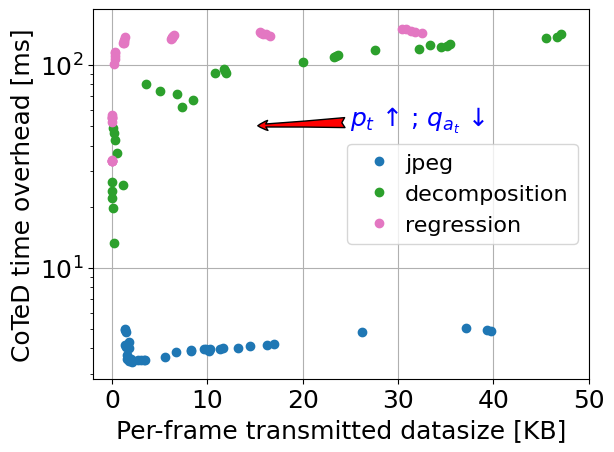

In [44]:
plt.figure()
plt.plot(datasize_jpeg, cmp_time_jpeg,"o",color="tab:blue", label="jpeg")
plt.plot(datasize_decom, cmp_time_decom,"o",color="tab:green", label="decomposition")
plt.plot(datasize_reg, cmp_time_reg,"o",color="tab:pink", label="regression")
# no_split_map_30 = 0.524
# plt.scatter(0,no_split_map_30*100,200,marker="*",color=colors[3],label="No split")

plt.annotate(
    '$p_t$ ↑ ; $q_{a_t}$ ↓', 
    xy=(15, 50), 
    xytext=(25, 50), 
    arrowprops=dict(facecolor='red', arrowstyle='fancy'),
    color='blue',
)

plt.yscale("log")
plt.legend(loc="center right", fontsize=16, columnspacing=0.8,handletextpad=0.2)
plt.xlim([-2,50])
plt.grid()
plt.xlabel("Per-frame transmitted datasize [KB]")
plt.ylabel("CoTeD time overhead [ms]")
plt.savefig("../figures/cmp_time_vs_datasize.pdf", bbox_inches='tight')

In [7]:
df_jpeg_time = pd.read_csv("../measurements/jpeg_per_frame/time.csv")
df_jpeg_cha = pd.read_csv("../measurements/jpeg_per_frame/characteristic.csv")

df_decom_time = pd.read_csv("../measurements/decomposition_per_frame/time.csv")
df_decom_cha = pd.read_csv("../measurements/decomposition_per_frame/characteristic.csv")

df_reg_time = pd.read_csv("../measurements/regression_per_frame/time.csv")
df_reg_cha = pd.read_csv("../measurements/regression_per_frame/characteristic.csv")

df_local_time = pd.read_csv("../measurements/local_time_short/time.csv")

# df_jpeg_time = pd.read_csv("../measurements_vidvrd/jpeg_small/time.csv")
# df_jpeg_cha = pd.read_csv("../measurements_vidvrd/jpeg_small/characteristic.csv")

# df_decom_time = pd.read_csv("../measurements_vidvrd/decomposition_small/time.csv")
# df_decom_cha = pd.read_csv("../measurements_vidvrd/decomposition_small/characteristic.csv")

# df_reg_time = pd.read_csv("../measurements_vidvrd/regression_small/time.csv")
# df_reg_cha = pd.read_csv("../measurements_vidvrd/regression_small/characteristic.csv")

df_jpeg_time["datasize_est"] = df_jpeg_cha["datasize_est"]
df_decom_time["datasize_est"] = df_decom_cha["datasize_est"]
df_reg_time["datasize_est"] = df_reg_cha["datasize_est"]

df_jpeg_time = df_jpeg_time[df_jpeg_time["model_head_time"]<20]
df_decom_time = df_decom_time[df_decom_time["model_head_time"]<20]
df_reg_time = df_reg_time[df_reg_time["model_head_time"]<20]

In [31]:
df_group = df_jpeg_time.groupby("pruning_thresh")
datasize_jpeg = []
cmp_time_jpeg = []
for k1 in df_group.groups.keys():
    group = df_group.get_group(k1)
    groups_2 = group.groupby("quality")
    for k2 in groups_2.groups.keys():
        conf_g = groups_2.get_group(k2)
        datasize_jpeg.append(conf_g["datasize_est"].to_numpy().mean()/1000)
        cmp_time_jpeg.append((conf_g["compression_time"]+
                              conf_g["decompression_time"]+
                              conf_g["framework_head_time"]+
                              conf_g["framework_tail_time"]+
                              conf_g["model_head_time"]*10+
                              conf_g["model_tail_time"]+
                              conf_g["datasize_est"]*8/1e7*1000).to_numpy().mean())

df_group = df_decom_time.groupby("pruning_thresh")
datasize_decom = []
cmp_time_decom = []
for k1 in df_group.groups.keys():
    group = df_group.get_group(k1)
    groups_2 = group.groupby("quality")
    for k2 in groups_2.groups.keys():
        conf_g = groups_2.get_group(k2)
        datasize_decom.append(conf_g["datasize_est"].to_numpy().mean()/1000)
        cmp_time_decom.append(conf_g["compression_time"].to_numpy().mean()/32+
                              (
                               conf_g["decompression_time"]+
                               conf_g["framework_head_time"]+
                              conf_g["framework_tail_time"]+
                              conf_g["model_head_time"]*10+
                              conf_g["model_tail_time"]+
                              conf_g["datasize_est"]*8/1e7*1000).to_numpy().mean())

df_group = df_reg_time.groupby("pruning_thresh")
datasize_reg = []
cmp_time_reg = []
for k1 in df_group.groups.keys():
    group = df_group.get_group(k1)
    groups_2 = group.groupby("quality")
    for k2 in groups_2.groups.keys():
        conf_g = groups_2.get_group(k2)
        datasize_reg.append(conf_g["datasize_est"].to_numpy().mean()/1000)
        cmp_time_reg.append((conf_g["compression_time"]+
                             conf_g["decompression_time"]+
                             conf_g["framework_head_time"]+
                              conf_g["framework_tail_time"]+
                              conf_g["model_head_time"]*10+
                              conf_g["model_tail_time"]+
                              conf_g["datasize_est"]*8/1e7*1000).to_numpy().mean())

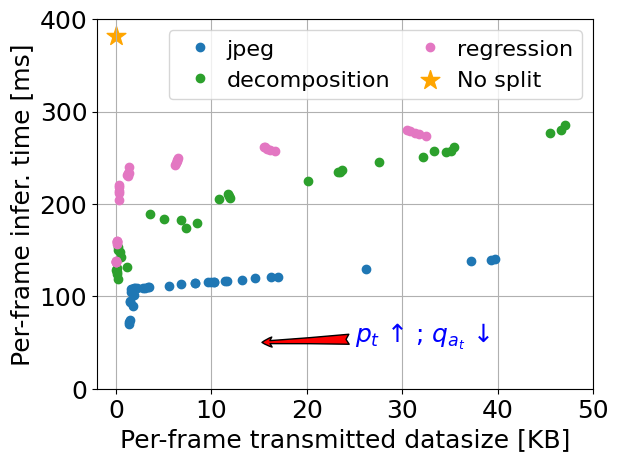

In [35]:
plt.figure()
plt.plot(datasize_jpeg, cmp_time_jpeg,"o",color="tab:blue", label="jpeg")
plt.plot(datasize_decom, cmp_time_decom,"o",color="tab:green", label="decomposition")
plt.plot(datasize_reg, cmp_time_reg,"o",color="tab:pink", label="regression")
plt.scatter(0,df_local_time["overall_time"].mean()*10,200,marker="*",color="orange",label="No split")
# no_split_map_30 = 0.524
# plt.scatter(0,no_split_map_30*100,200,marker="*",color=colors[3],label="No split")

plt.annotate(
    '$p_t$ ↑ ; $q_{a_t}$ ↓', 
    xy=(15, 50), 
    xytext=(25, 50), 
    arrowprops=dict(facecolor='red', arrowstyle='fancy'),
    color='blue',
)

# plt.yscale("log")
plt.legend(loc="upper right",ncol=2,fontsize=16, columnspacing=0.8,handletextpad=0.2)
plt.xlim([-2,50])
plt.ylim([0,400])
plt.grid()
plt.xlabel("Per-frame transmitted datasize [KB]")
plt.ylabel("Per-frame infer. time [ms]")
plt.savefig("../figures/overall_inftime_datasie.pdf", bbox_inches='tight')